In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import os

In [9]:
os.chdir("/home/rivlanm/cmu/v2x/v2x-privacy-sim/")

### Exp 1

pb range 0 -> .1

freq 1H

Policy 1

In [18]:
pb_range = np.arange(0.0025,.1,0.0025)

exp_dir = "exp_data/Freq1_Policy1/PB{}_SB0_HB0"

results_arr = []
for pb in pb_range:
    pb = round(pb,4)
    exp = exp_dir.format(pb)
    results_ = pd.read_csv("{}/results.csv".format(exp))
    results_["pb"] = pb
    print(results_)
    results_arr.append(results_)



   fq  pc  prec    recall  f1_score      pb
0   1   1  0.25  0.000172  0.000344  0.0025
   fq  pc      prec    recall  f1_score     pb
0   1   1  0.434783  0.001726  0.003438  0.005
   fq  pc     prec    recall  f1_score      pb
0   1   1  0.44186  0.003285  0.006521  0.0075
   fq  pc      prec    recall  f1_score    pb
0   1   1  0.473684  0.004673  0.009254  0.01
   fq  pc      prec    recall  f1_score      pb
0   1   1  0.504673  0.009383  0.018424  0.0125
   fq  pc      prec    recall  f1_score     pb
0   1   1  0.555556  0.011295  0.022139  0.015
   fq  pc      prec    recall  f1_score      pb
0   1   1  0.623596  0.019338  0.037513  0.0175
   fq  pc      prec    recall  f1_score    pb
0   1   1  0.567308  0.020647  0.039845  0.02
   fq  pc      prec    recall  f1_score      pb
0   1   1  0.545455  0.025316  0.048387  0.0225
   fq  pc     prec    recall  f1_score     pb
0   1   1  0.56962  0.031752   0.06015  0.025
   fq  pc      prec    recall  f1_score      pb
0   1   1  0.66272

<Axes: xlabel='pb', ylabel='recall'>

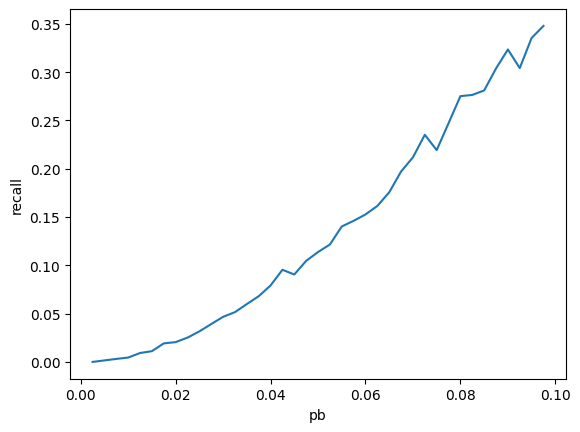

In [11]:
results = pd.concat(results_arr).reset_index(drop=True)
sns.lineplot(results, x="pb", y="recall")

<Axes: xlabel='pb', ylabel='prec'>

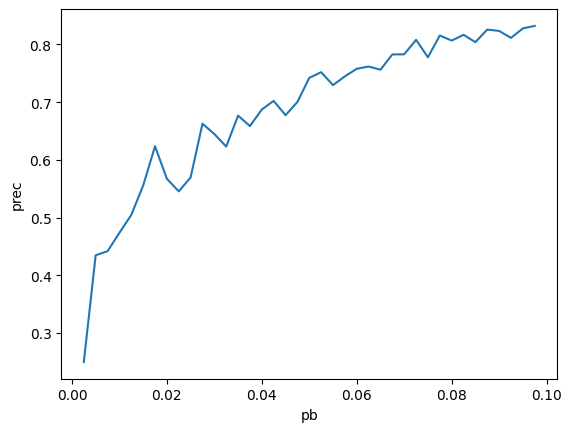

In [12]:
sns.lineplot(results, x="pb", y="prec")

In [26]:
pb_range = np.arange(0.0025,.1,0.0025)

exp_dir = "exp_data/Freq1_Policy1/PB{}_SB0_HB0"

posn_arr = []
pb_arr = []
for pb in pb_range:
    pb = round(pb,4)
    exp = exp_dir.format(pb)
    results_ = pd.read_csv("{}/positional_noise.csv".format(exp))
    results_ = np.mean(results_.values)
    pb_arr.append(pb)
    posn_arr.append(results_)

       1.844404458599452710e+03
0                    157.122307
1                    668.198186
2                    665.974366
3                   1756.259209
4                   1866.225112
...                         ...
11597                926.697860
11598                613.065153
11599                339.286012
11600               1387.906731
11601                975.410627

[11602 rows x 1 columns]
       2.768027741379202666e+02
0                    856.530332
1                    765.305098
2                    978.278616
3                    494.999314
4                    720.052118
...                         ...
11597                 27.533717
11598                140.203237
11599                119.691562
11600                344.797068
11601                547.279431

[11602 rows x 1 columns]
       5.391836278846544701e+02
0                    761.619297
1                    626.656526
2                    864.473315
3                    255.302690
4                   

       1.828128150201364690e+02
0                    509.270414
1                    594.246977
2                    691.255535
3                    323.562453
4                    635.741693
...                         ...
11597                148.272318
11598                 26.902906
11599                206.295772
11600                154.351881
11601                496.563717

[11602 rows x 1 columns]


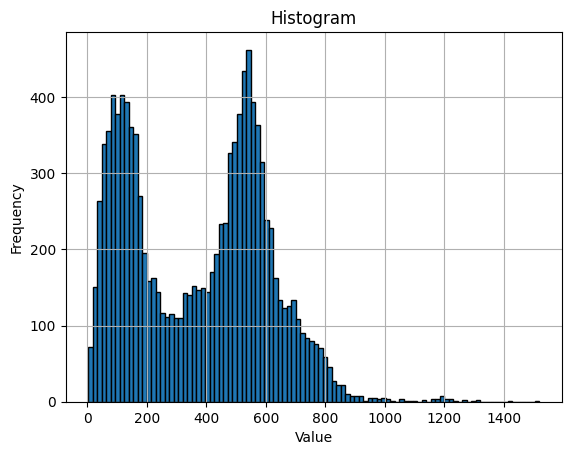

In [43]:
import matplotlib.pyplot as plt
results_ = pd.read_csv("/Users/icmccorm/git/v2x-privacy-sim/exp_data/Freq1_Policy1/PB0.025_SB0_HB0/positional_noise.csv")
print(results_)
hist, bins = np.histogram(results_.values, bins=100)  # Adjust the number of bins as needed
# Plot histogram
plt.hist(results_.values, bins=bins, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
np.mean(results_.values)

899.1822164905969

        PB  Ave Positional Distance
0   0.0025               899.182216
1   0.0050               561.388248
2   0.0075               467.391761
3   0.0100               430.128094
4   0.0125               409.515263
5   0.0150               394.368775
6   0.0175               388.303983
7   0.0200               381.084517
8   0.0225               378.906494
9   0.0250               374.338498
10  0.0275               372.998215
11  0.0300               370.792003
12  0.0325               367.891179
13  0.0350               367.232127
14  0.0375               366.208816
15  0.0400               366.200314
16  0.0425               365.276766
17  0.0450               364.465864
18  0.0475               363.847580
19  0.0500               363.607633
20  0.0525               363.625077
21  0.0550               363.080408
22  0.0575               362.933624
23  0.0600               362.016989
24  0.0625               362.106965
25  0.0650               361.801533
26  0.0675               362

<Axes: xlabel='PB', ylabel='Ave Positional Distance'>

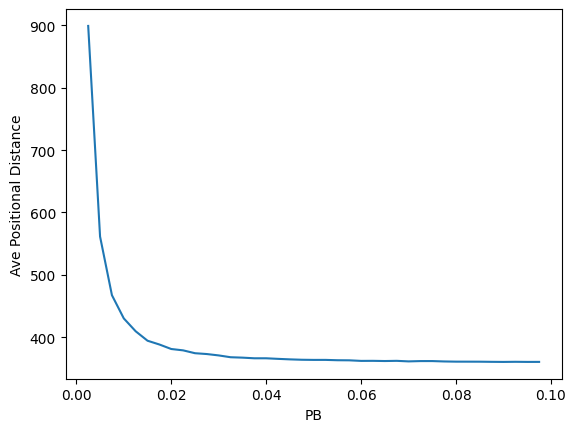

In [25]:
df_pos_noise = pd.DataFrame(list(zip(pb_arr, posn_arr)), columns=['PB', 'Ave Positional Distance'])
print(df_pos_noise)
sns.lineplot(df_pos_noise, x="PB", y="Ave Positional Distance")